**Supritha M Bhatt Task 2 - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

##Importing libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing dataset

In [78]:
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [79]:
x = dataset.iloc[:, [3,4]].values
print(x[0])

[1.4 0.2]


##Using the elbow method to find the optimal number of clusters 

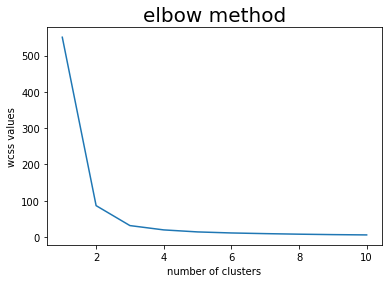

In [80]:
from sklearn.cluster import  KMeans
wcss = []
for i in range(1,11):
  kmean_obj = KMeans(n_clusters=i,init='k-means++', random_state=42)
  kmean_obj.fit(x)
  wcss.append(kmean_obj.inertia_)

plt.plot(range(1,11), wcss)
plt.title("elbow method", size=20)
plt.xlabel("number of clusters")
plt.ylabel("wcss values")
plt.show()

##Training K means model for **3** clusters


In [81]:
kmeans_main_obj = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_dep_pred = kmeans_main_obj.fit_predict(x)

In [82]:
print(y_dep_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


##Visualize the clusters

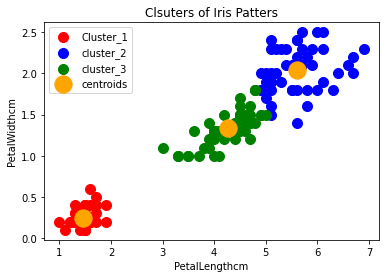

In [83]:
plt.scatter(x[ y_dep_pred==0,0],x[ y_dep_pred==0,1],s=100, c='red',label ='Cluster_1')
plt.scatter(x[ y_dep_pred==1,0],x[ y_dep_pred==1,1],s=100, c='blue' , label='cluster_2')
plt.scatter(x[ y_dep_pred==2,0],x[ y_dep_pred==2,1],s=100, c='green' , label='cluster_3')

#now we are plotting the centroids of these clusters
#in order to get that we use kmeans attribute named cluster centers
plt.scatter(kmeans_main_obj.cluster_centers_[:,0], kmeans_main_obj.cluster_centers_[:,1] , s=300 , c='orange', label='centroids')


plt.title("Clsuters of Iris Patters")
plt.xlabel("PetalLengthcm")
plt.ylabel("PetalWidthcm")
plt.legend()
plt.show()
